### LDA

In [1]:
from gensim import corpora
from gensim import models

import pickle
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
df_processed = pd.read_csv("/Users/gimseojin/Desktop/2022-1/응용머신러닝/final project/data/df_merged.csv")

In [3]:
df_processed2 = pd.read_csv("/Users/gimseojin/Desktop/2022-1/응용머신러닝/final project/data/df_merged2.csv")

In [4]:
NUM_TOPICS = 10
NUM_TOPIC_WORDS = 30

In [6]:
def build_doc_word_matrix(docs):
    dictionary = corpora.Dictionary(docs)
    # 각 단어의 ID 정보를 얻음
    corpus = []
    for doc in docs:
        bow = dictionary.doc2bow(doc) # 각 문서를 TF 정보를 이용해서 벡터로 변환
        corpus.append(bow)

    return corpus, dictionary


In [5]:
display(df_processed)

,label,title_new,emoji,views,subs,channel_name
0,0,"['사람', '번만', '사람', '레전드', '꿀잼', '드라마', '뷰티', '...",False,804394.0,1960000.0,고몽
1,0,"['할인', '뷰마', '박스', '공개']",True,199959.0,352000.0,뷰티마우스
2,0,"['요즘', '프로필', '메이크업', '연예인', '프로필', '메이크업', '역...",False,61394.0,159000.0,옥뷰티 OK Beauty
3,0,"['배우', '잠적', '이유', '뷰티', '사이드', '요약']",False,7568.0,250000.0,DRAMA Voyage
4,0,"['청담동', '메이크업', '추천', '그대로', '구매', '지속', '파운데이...",False,193907.0,133000.0,뷰티숨BEAUTYSOOM
...,...,...,...,...,...,...
26737,4,"['아줌마', '브이', '로그', '주부', '일상', '네일아트', 'vlog'...",False,93572.0,102000.0,양아치TV AUNT TV
26738,4,"['미국', '유학생', '일상', '브이', '로그', '학교', '브이', '로...",False,1208.0,522.0,예슬 Serena
26739,4,"['미국', '유학생', '일상', '브이', '로그', '주말', '브이', '로...",False,950.0,522.0,예슬 Serena
26740,4,"['I', 'MADE', 'A', 'TINY', 'HOUSE', 'USING', '...",False,162171.0,1070000.0,Tesla US


In [7]:
import re
def reprocess(text):
    return re.sub(r'[^\s\d\w]','',text).split(' ')


In [8]:
df_processed['title_new'] = df_processed['title_new'].apply(reprocess)

In [9]:
df_processed2['title_new'] = df_processed2['title_new'].apply(reprocess)

In [10]:
corpus, dictionary = build_doc_word_matrix(df_processed['title_new'])

In [11]:
corpus2, dictionary2 = build_doc_word_matrix(df_processed2['title_new'])

In [12]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 27023
Number of documents: 26742


In [13]:
def print_topic_words(model):
    f = open('topic_results_test.txt','w')
    for topic_id in range(model.num_topics):
        word_probs = model.show_topic(topic_id, 2)
        print("Topic ID: {}".format(topic_id))
        f.write(str(topic_id)+'\n')
        for word, prob in word_probs:
            print("\t{}\t{}".format(word, prob))
            f.write(str(word)+'\t'+str(prob)+'\n')
        print("\n")
    f.close()

In [14]:
lda_model = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary)
print_topic_words(lda_model)

Topic ID: 0
	공부	0.03373109921813011
	I	0.01419257465749979


Topic ID: 1
	먹방	0.07409565895795822
	ASMR	0.021721987053751945


Topic ID: 2
	브이	0.16037805378437042
	로그	0.1510409265756607


Topic ID: 3
	여행	0.042500611394643784
	운동	0.016348131000995636


Topic ID: 4
	지식	0.09329600632190704
	먹방	0.021236684173345566




In [15]:
lda_model2 = models.ldamodel.LdaModel(corpus2, num_topics=5, id2word=dictionary2)
print_topic_words(lda_model2)

Topic ID: 0
	센터	0.05003736913204193
	산업	0.04329858720302582


Topic ID: 1
	카페	0.05301668494939804
	요리	0.016956185922026634


Topic ID: 2
	브이	0.18208636343479156
	로그	0.17263294756412506


Topic ID: 3
	지식	0.11508319526910782
	먹방	0.08553826063871384


Topic ID: 4
	운동	0.02961881458759308
	다이어트	0.0187144223600626




6
10
14
18
22
26
30
34
38
42


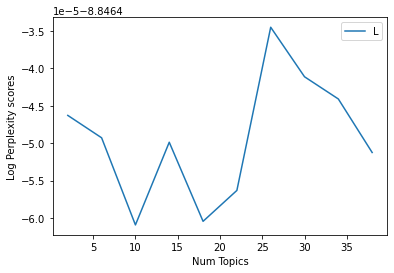

In [31]:
### calculating log perplexity score to check optimal # of topics
start1 = 2
limit1 = 40
step1 = 4
perplexity_scores=[]
topic_num = 2
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                    id2word=dictionary,
                    alpha='auto')
    perplexity_scores.append(lda_model.log_perplexity(corpus))
    topic_num += step1
    print(topic_num)

import matplotlib.pyplot as plt
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

In [16]:
lda_model_2 = models.ldamodel.LdaModel(corpus, num_topics=2, id2word=dictionary)

In [17]:
lda_model2_2 = models.ldamodel.LdaModel(corpus2, num_topics=2, id2word=dictionary2)

In [18]:
def print_topic_words_2(model):
    f = open('topic_results_test.txt','w')
    for topic_id in range(model.num_topics):
        word_probs = model.show_topic(topic_id, 2)
        print("Topic ID: {}".format(topic_id))
        f.write(str(topic_id)+'\n')
        for word, prob in word_probs:
            print("\t{}\t{}".format(word, prob))
            f.write(str(word)+'\t'+str(prob)+'\n')
        print("\n")
    f.close()

In [19]:
print_topic_words_2(lda_model_2)

Topic ID: 0
	브이	0.0994403064250946
	로그	0.09353416413068771


Topic ID: 1
	지식	0.04648600146174431
	센터	0.017391439527273178




In [20]:
print_topic_words_2(lda_model2_2)

Topic ID: 0
	브이	0.11860506236553192
	로그	0.1123284101486206


Topic ID: 1
	지식	0.061414506286382675
	센터	0.021875742822885513




In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(prepared_data)
pyLDAvis.save_html(prepared_data, 'LDAvis_1.html')

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depreca

In [22]:
prepared_data2 = gensimvis.prepare(lda_model2, corpus2, dictionary2)
pyLDAvis.display(prepared_data2)
pyLDAvis.save_html(prepared_data2, 'LDAvis_2.html')

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
topic_results=lda_model.get_document_topics(corpus, minimum_probability=0.0)

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
topic_DTM =[]
for k in range(len(topic_results)):
    topic_vector = [prob for i, prob in topic_results[k]]
    topic_DTM.append(topic_vector)

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
len(topic_DTM)

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


26742

In [26]:
topic_DTM = np.array(topic_DTM)

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Clustering

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(topic_DTM)

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
for k in range(10):
    print(clusters[k], df_processed['title_new'][k])

3 ['사람', '번만', '사람', '레전드', '꿀잼', '드라마', '뷰티', '사이드', '보기', 'part']
4 ['할인', '뷰마', '박스', '공개']
0 ['요즘', '프로필', '메이크업', '연예인', '프로필', '메이크업', '역대', '메이크업']
0 ['배우', '잠적', '이유', '뷰티', '사이드', '요약']
0 ['청담동', '메이크업', '추천', '그대로', '구매', '지속', '파운데이션', '가닥', '속눈썹', '고급', '하이', '라이터', '웨딩', '조합', 'sub']
1 ['메이크업', '청담동', '프라이', '웨딩', '퍼스', '웨딩', '헤어', '메이크업', '샵함', '경식', 'sub', 'ASMR', 'ft']
1 ['달걀', '힐링', '타임즈', 'EP', 'ASMR', 'Oddly', 'Satisfying', 'Cosmetic', 'Destruction']
0 ['상체', '사람', '특징', '부분', '확인', '박민영', '강미', '셜록', '뷰티', 'quot', 'quot', 'ft']
0 ['팔자주름', '뷰티', '디바이스', '보고', 'Best']
3 ['시간', '삭제', '드라마', '뷰티', '사이드', 'SSSSSSS', 'JTBC', 'part']


/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=5)
model2_clusters = model2.fit(topic_DTM)
model2_clusters.labels_

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:493: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  children_ = out[:, :2].astype(np.i

array([0, 3, 4, ..., 1, 3, 1])

In [34]:
# keyboard interrupt
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
Z = linkage(topic_DTM, 'average', metric = 'cosine')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [38]:
for k in range(10):
    print(model2_clusters.labels_[k], df['영상제목'][k])

9 Mukbang  TwinRoozi Family
4 King crab 킹크랩 Mukbang TwinRoozi 쌍둥이루지 먹방 조안나 언니
2 Mukbang 딸기 귤 탕후루 쿄호젤리 Tanghulu Strawberry tangerine Kyoho jelly TwinRoozi Family 쌍둥이루지 가족
9 Mukbang 화과자 꿀타래 Japanese sweets TwinRoozi Family 쌍둥이루지 가족 먹방  Mukbang
2 Mukbang 달러 꿀복숭아 Dollar Peach 桃 TwinRoozi 쌍둥이루지 먹방 Family
9 뽀로로 떡볶이 짜장면 BBororo TTeokbokki Noddle TwinRoozi Family 쌍둥이루지 가족 먹방  Mukbang
9 Chicken Tteokbokki 떡볶이TwinRoozi Family 쌍둥이루지 가족 먹방  Mukbang
4 시네마 먹방 세븐일레븐 트윈루지 짝꿍 삼각김밥 TwinRoozi Mukbang 쌍둥이루지
9 ENG) Mukbang OctopusNoodles 낙지라면 조안나 Zoana
4 개불 Spoon worm 먹방 TwinRoozi Family 쌍둥이루지 가족 먹방  Mukbang


In [35]:
topics_terms_prob = lda_model.get_topics()
topics_terms_prob.shape

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5, 27023)

In [36]:
topics_terms_prob[:,1]

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.00001, 0.00005, 0.     , 0.00001, 0.0005 ], dtype=float32)

In [37]:
LDA_words = []
for k in lda_model.id2word:
    LDA_words.append(lda_model.id2word[k])
LDA_words[:100]

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['part',
 '꿀잼',
 '드라마',
 '레전드',
 '번만',
 '보기',
 '뷰티',
 '사람',
 '사이드',
 '공개',
 '박스',
 '뷰마',
 '할인',
 '메이크업',
 '역대',
 '연예인',
 '요즘',
 '프로필',
 '배우',
 '요약',
 '이유',
 '잠적',
 'sub',
 '가닥',
 '고급',
 '구매',
 '그대로',
 '라이터',
 '속눈썹',
 '웨딩',
 '조합',
 '지속',
 '청담동',
 '추천',
 '파운데이션',
 '하이',
 'ASMR',
 'ft',
 '경식',
 '샵함',
 '퍼스',
 '프라이',
 '헤어',
 'Cosmetic',
 'Destruction',
 'EP',
 'Oddly',
 'Satisfying',
 '달걀',
 '타임즈',
 '힐링',
 'quot',
 '강미',
 '박민영',
 '부분',
 '상체',
 '셜록',
 '특징',
 '확인',
 'Best',
 '디바이스',
 '보고',
 '팔자주름',
 'JTBC',
 'SSSSSSS',
 '삭제',
 '시간',
 '메이플',
 '어워즈',
 '오로라',
 '유니온',
 '확장',
 'zip',
 '글래스',
 '꿀템',
 '레오',
 '모음',
 '베이스',
 '봄웜',
 '브러쉬',
 '스킨',
 '스테이',
 '신상',
 '실키',
 '애교살',
 '제이',
 '진정',
 '케어',
 '틴트',
 '팔레트',
 '헤라',
 '경력',
 '디올',
 '리뷰',
 '립스틱',
 '아주',
 '어딕트',
 '컬러',
 '케이스',
 'VLOG']

In [38]:
words_dict={}
for i, word in enumerate(LDA_words):
    words_dict[word]=i

# 각 단어의 vector값 찾기, lda 결과를 이용
words_vectors =[]
for word in LDA_words:
    word_id = words_dict[word]
#     print(word, word_id, np.argmax(topics_terms_proba[:,word_id]), np.max(topics_terms_proba[:,word_id]))
    words_vectors.append(topics_terms_prob[:,word_id])

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
word1 = '먹방'
word2 = 'mukbang'
word1_id = words_dict[word1]
word2_id = words_dict[word2]
np.dot(words_vectors[word1_id], words_vectors[word2_id])/(np.linalg.norm(words_vectors[word1_id])*np.linalg.norm(words_vectors[word2_id]))

/Users/gimseojin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.16640787